<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear II</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso *dataset* é uma amostra aleatória de tamanho 5000 de imóveis disponíveis para venda no município do Rio de Janeiro.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel</li>
    <li><b>Area</b> - Área do imóvel em m²</li>
    <li><b>Dist_Praia</b> - Distância do imóvel até a praia (km) (em linha reta)</li>
    <li><b>Dist_Farmacia</b> - Distância do imóvel até a farmácia mais próxima (km) (em linha reta)</li>
</ul>

## Leitura dos dados

In [2]:
dados = pd.read_csv('../../../dataset/dataset_reg_lin_2.csv', sep=';')

## Visualizar os dados

In [3]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


## Verificando o tamanho do dataset

In [4]:
dados.shape

(5000, 4)

In [5]:
len(dados)

5000

# <font color='red' style='font-size: 30px;'>1.3 Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [6]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita (variaveis em direção contrarias) e <b>+1</b> indica associação positiva perfeita (variaveis na mesma direção).</p>

### Como analisar a matriz de correlação?
A matriz de correlação é uma tabela que mostra o coeficiente de correlação entre cada par de variáveis. A diagonal principal da matriz sempre terá o valor 1, pois cada variável é perfeitamente correlacionada consigo mesma. Os valores fora da diagonal indicam a força e a direção da relação linear entre as variáveis.

#### Em relação a variavel `valor` (preço do imóvel), podemos observar que:

- Área (m²) tem uma correlação positiva de 0.72, indicando que imóveis maiores tendem a ter preços mais altos.
- Distância até a Praia (km) tem uma correlação negativa de -0.49, sugerindo que quanto mais distante o imóvel está da praia, menor tende a ser seu preço.
- Distância até a Farmácia (km) tem uma correlação negativa de -0.20, indicando que imóveis mais distantes de farmácias tendem a ter preços mais baixos, mas essa relação é menos forte.

> Valores mínimos e máximos muito discrepantes das demais estatísticas pode nos fazer desconfiar da presença de outliers.
> É possível desconfiar da presença de outliers apenas olhando para as estatísticas descritivas reportadas pelo método describe(), de pandas.

In [7]:
dados.corr().round(4)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Praia,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


# <font color='red' style='font-size: 30px;'>2.1 Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [8]:
import seaborn as sns

## Configurações de formatação dos gráficos

In [9]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Accent')
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

## Box plot da variável *dependente* (y)

<img width='700px' src='../Dados/img/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<Axes: title={'center': 'Preço dos Imóveis'}, xlabel='Reais'>

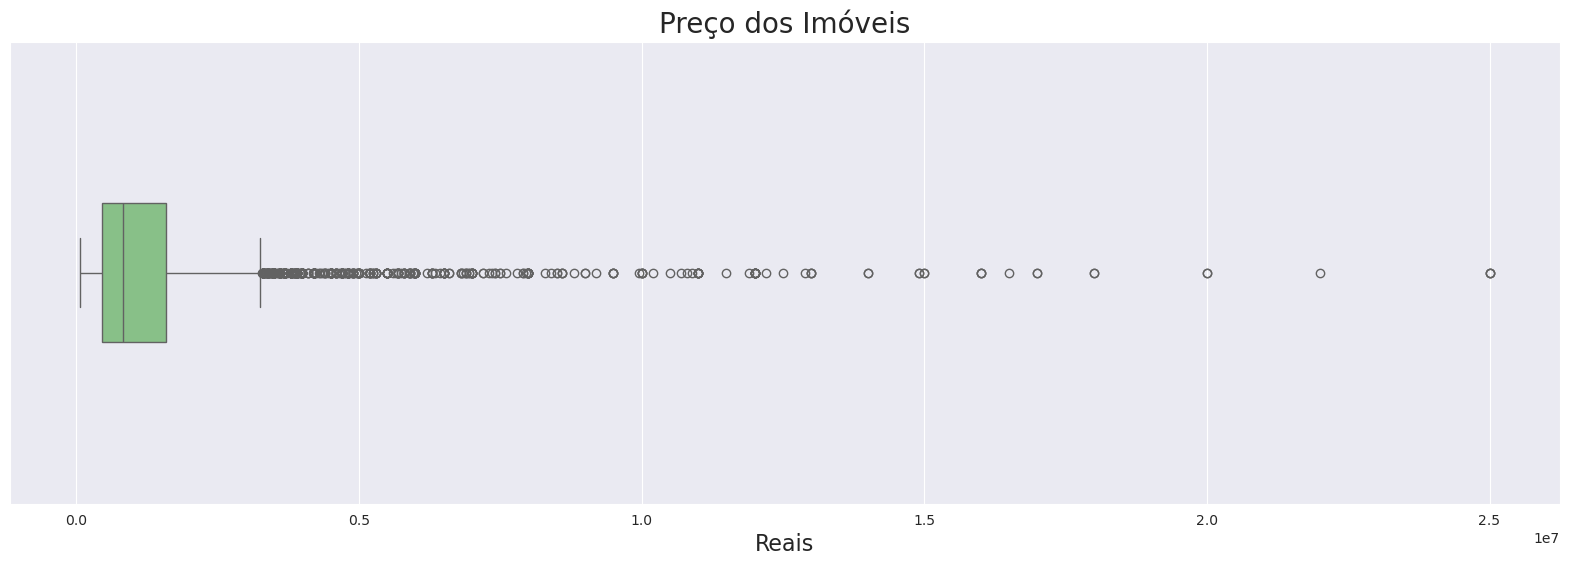

In [10]:
# É conveniente para analise que os dados sejam retirados de uma população com distribuição normal, mas não é obrigatório. Com o box-plot é uma ferramenta de visualização que nos ajuda a identificar a presença de outliers e a distribuição dos dados.
ax = sns.boxplot(x='Valor', data=dados, orient='h', width=0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

#### A interpretação do box-plot é a seguinte:
- A linha central do box representa a mediana dos dados, que é o valor que divide os dados em duas partes iguais.
- A caixa (box) representa o intervalo interquartil (IQR), que é a diferença entre o primeiro quartil (Q1) e o terceiro quartil (Q3). O IQR contém 50% dos dados.
- As linhas (whiskers) que se estendem a partir da caixa representam a variação dos dados fora do IQR. Elas se estendem até o menor e o maior valor dentro de 1,5 vezes o IQR.
- Os pontos fora das linhas (whiskers) são considerados outliers, ou seja, valores que estão muito distantes da maioria dos dados.
- A presença de outliers pode indicar erros de medição, dados extremos ou variabilidade natural dos dados.

# <font color='red' style='font-size: 30px;'>2.2 Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

/tmp/ipykernel_22543/2366155230.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['Valor'])


<Axes: title={'center': 'Distribuicao de Frequencias'}, xlabel='Preço dos Imóveis (R$)', ylabel='Density'>

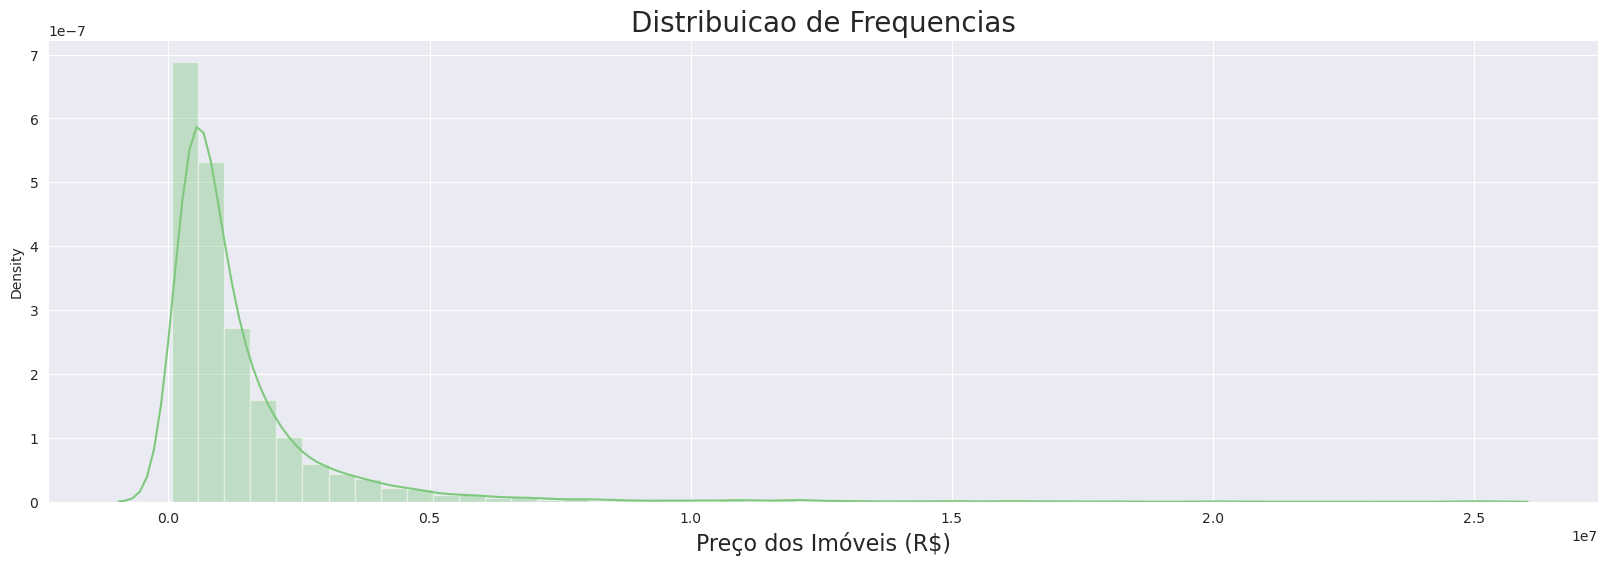

In [11]:
ax = sns.distplot(dados['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuicao de Frequencias', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

<img width='600px' src='../Dados/img/Box-Plot II.png'>

#### A interpretação do gráfico de distribuição de frequências é a seguinte:
- A distribuição dos preços dos imóveis é assimétrica, com uma cauda longa à direita, indicando que há muitos imóveis com preços mais baixos e poucos imóveis com preços muito altos.
- A presença de outliers é evidente, pois há imóveis com preços muito altos em relação à maioria dos imóveis.
- A distribuição não segue uma distribuição normal, pois a maioria dos dados está concentrada em torno de preços mais baixos, enquanto os preços mais altos são menos frequentes.
- A presença de outliers pode afetar a média e a variância dos dados, tornando-os menos representativos da população como um todo.
- A distribuição de frequências é uma ferramenta útil para entender a variabilidade dos dados e identificar padrões ou tendências nos preços dos imóveis.

# <font color='red' style='font-size: 30px;'>2.3 Dispersão Entre as Variáveis</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset
Quando a distribuição não é simetrica (verificado através do box-plot e do gráfico de distribuição de frequencia), podemos realizar uma manobra para poder tornar simetrico, realizar as operações e depois inverter a transformação. Uma das manobras mais utilizadas é a transformação logarítmica, que transforma uma variável assimétrica em simétrica.

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

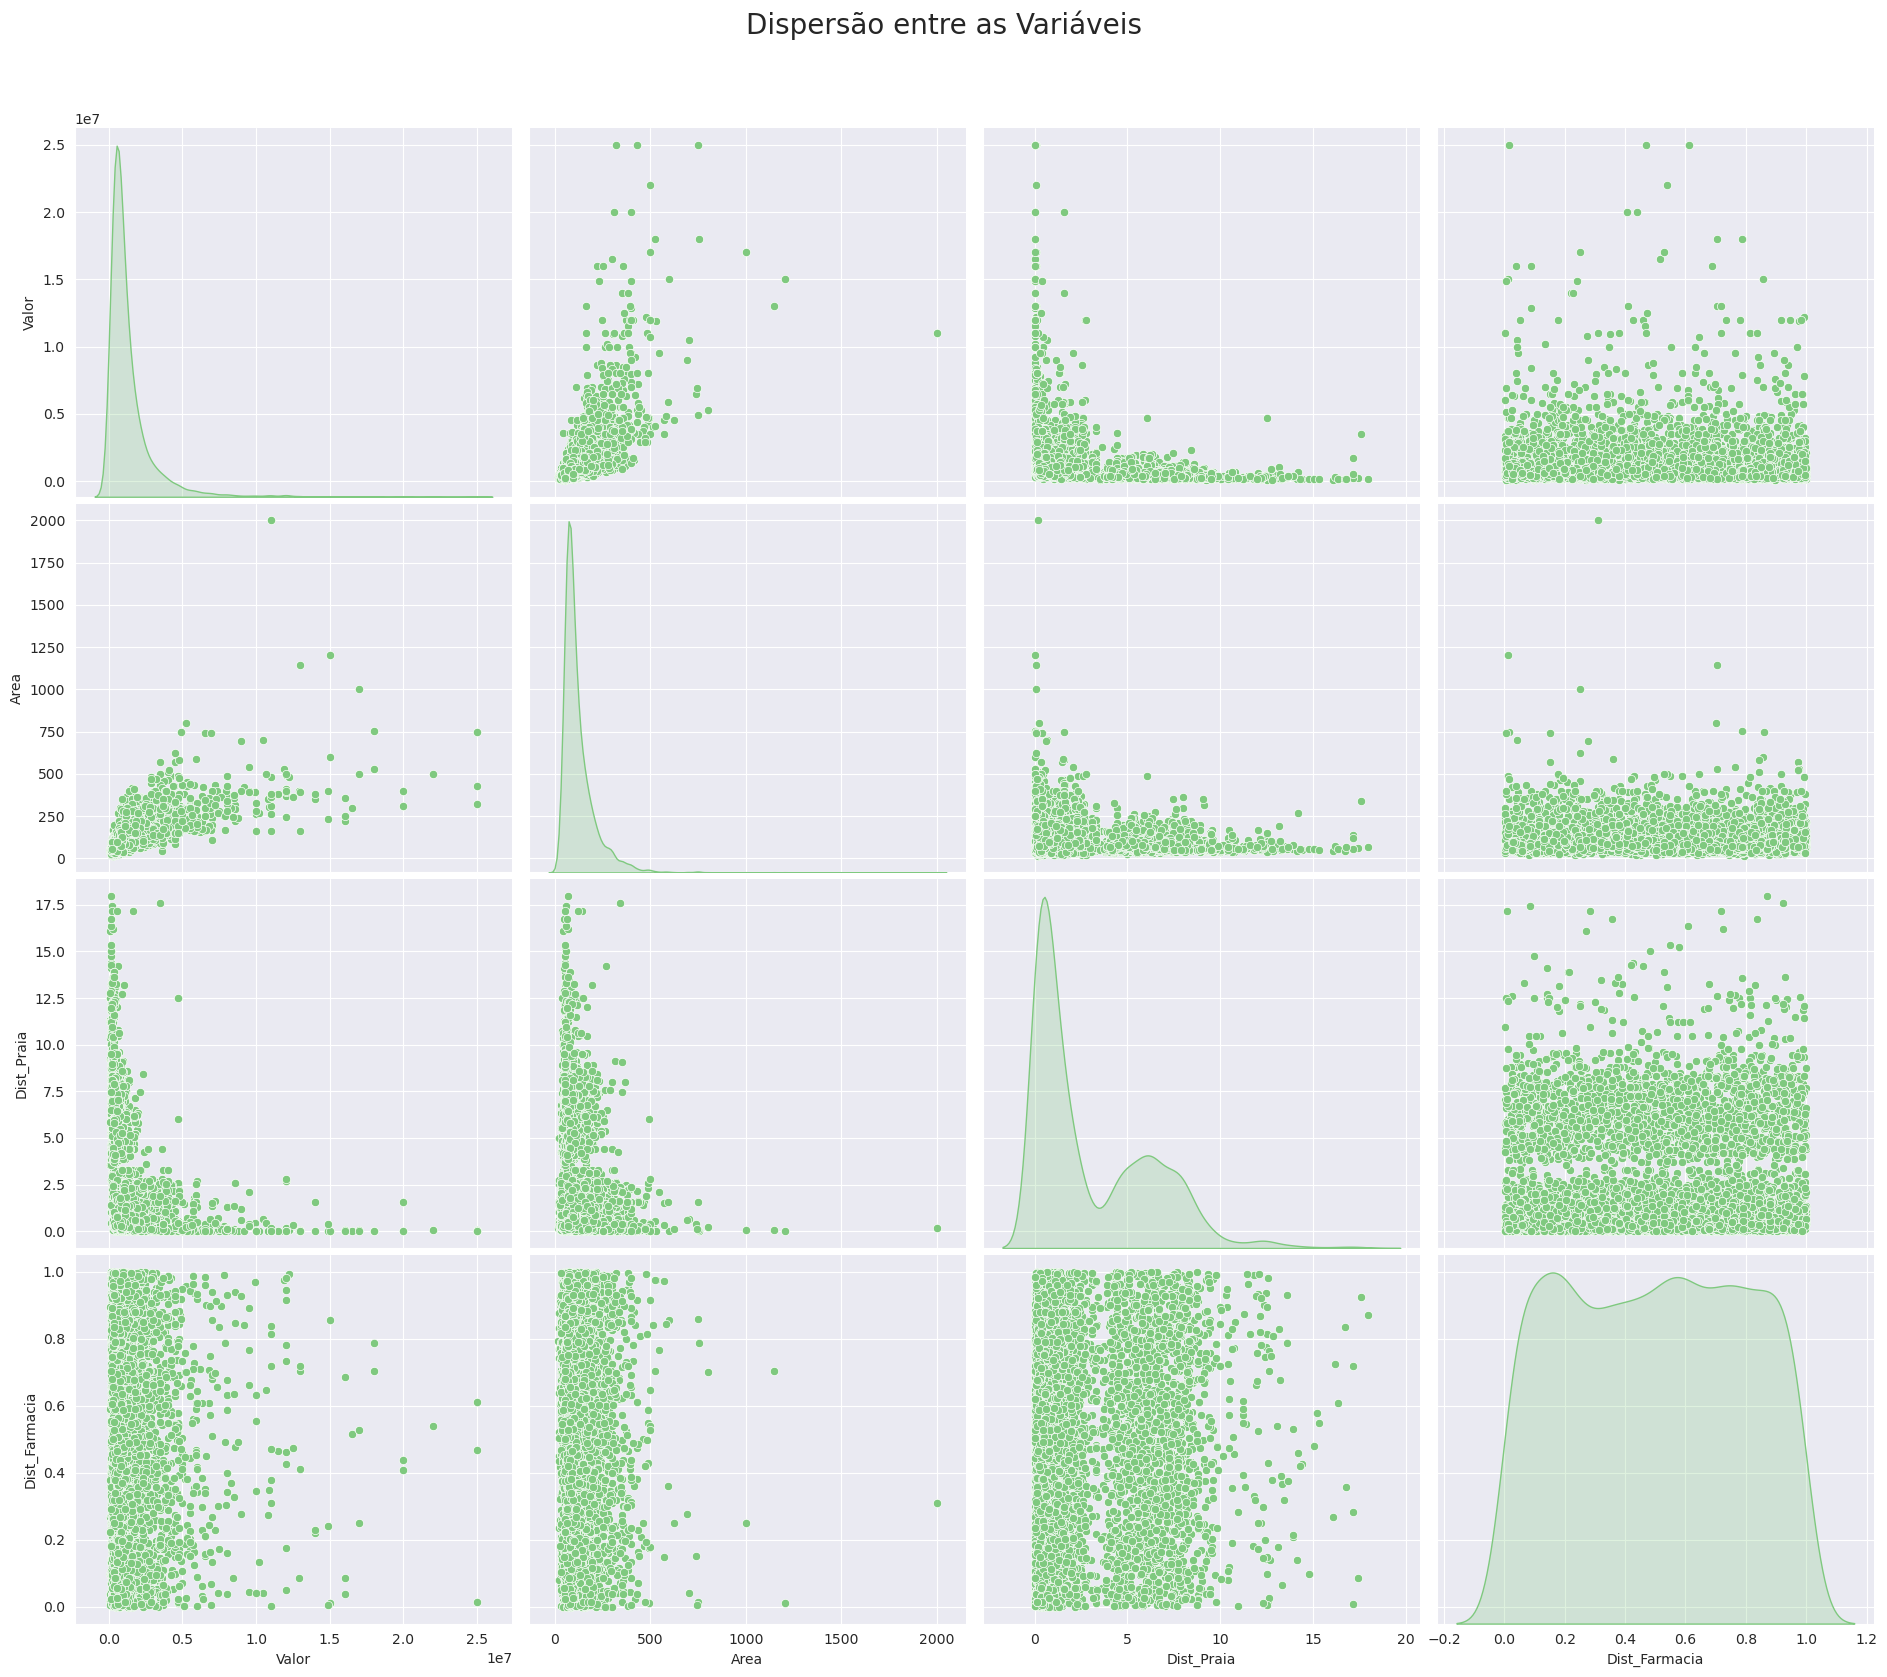

In [13]:
ax = sns.pairplot(dados, diag_kind='kde', height=4, aspect=1.2)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

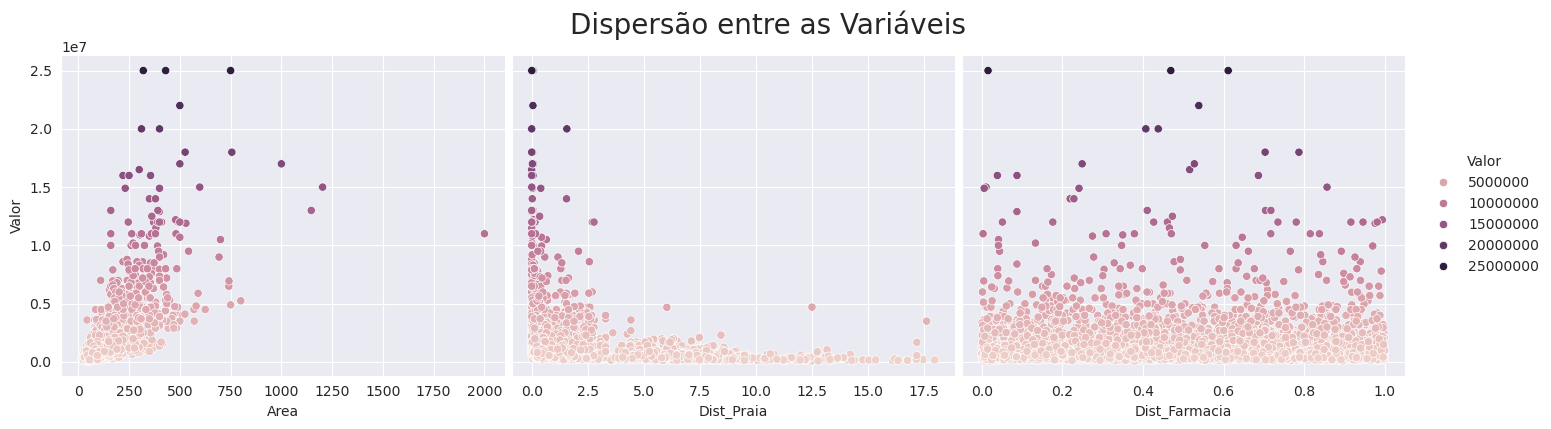

In [16]:
# Para apresentar apenas os gráficos de dispersão entre as variáveis explicativas e a variável dependente (preço dos imóveis), podemos utilizar o método pairplot com o argumento hue.
ax = sns.pairplot(dados, y_vars=['Valor'], x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], hue='Valor', diag_kind='kde', height=4, aspect=1.2)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

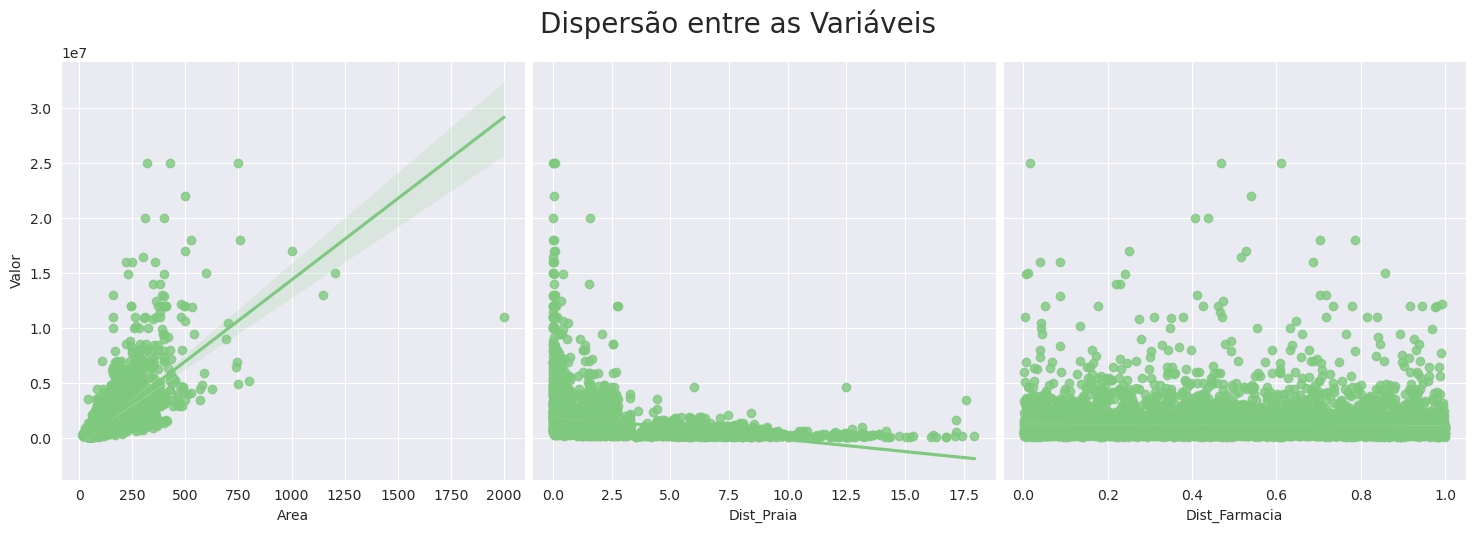

In [20]:
# para ajudar a visualização, podemos utilizar o argumento kind='reg' para traçar uma reta de regressão aos gráficos de dispersão.
ax = sns.pairplot(dados, y_vars=['Valor'], x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

#### A interpretação dos gráficos de dispersão é a seguinte:
- A reta de regrassao linear não ajuda a visualizar a relação entre as variáveis, pois os dados não seguem uma distribuição linear.
- A relação entre as variáveis é mais complexa e não pode ser capturada por uma reta de regressão linear simples.

### Como proceder?
Nestes casos é necessário realizar uma transformação dos dados para que a relação entre as variáveis possa ser capturada por uma reta de regressão linear simples. Uma das transformações mais comuns é a transformação logarítmica, que transforma uma variável assimétrica em simétrica.

### Aprendi ate aqui:
    Como configurar a formatação dos gráficos
    Como construir o box-plot da variável dependente
    Como realizar a distribuição de frequências da variável dependente
    Como plotar os gráficos de dispersão entre as variáveis do dataset
    A análise da dispersão entre as variáveis

# <font color='red' style='font-size: 30px;'>3.1 Transformando os Dados</font>
<hr style='border: 2px solid red;'>

## Distribuição Normal
<hr>

### Por quê? 
Testes paramétricos assumem que os dados amostrais foram coletados de uma população com distribuição de probabilidade conhecida. Boa parte dos testes estatísticos assumem que os dados seguem uma distribuição normal (t de Student, intervalos de confiança etc.).

#### Aplicando a transformação logarítmica
- Podemos transformar uma variável assimétrica em simétrica, o que nos permite utilizar testes paramétricos e assim aproveitar a base de dados para estimar um modelo de regreção linear.
- O objetivo é transformar os dados em uma distribuição simetrica.

## Importando biblioteca numpy

In [21]:
import numpy as np

## Aplicando a transformação logarítmica aos dados do *dataset*

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [26]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50,13.69,4.62,1.09,0.38
std,1883268.85,90.54,3.17,0.29,0.90,0.57,0.78,0.20
min,75000.00,16.00,0.00,0.00,11.23,2.77,0.00,0.00
25%,460000.00,70.00,0.44,0.24,13.04,4.25,0.36,0.21
50%,820000.00,93.00,1.48,0.50,13.62,4.53,0.91,0.41
75%,1590000.00,146.00,5.61,0.75,14.28,4.98,1.89,0.56
max,25000000.00,2000.00,17.96,1.00,17.03,7.60,2.94,0.69


In [22]:
# Aplicando a transformação logarítmica aos dados do dataset
# Deve-se observar a presença de valores 0 no dataset(metodo describe()), pois o log(0) não é definido.
# Para manter os dados, podemos aplicar a transformação logarítmica e os valores 0 soma-se 1.
dados['log_Valor'] = np.log(dados['Valor'])
dados['log_Area'] = np.log(dados['Area'])
dados['log_Dist_Praia'] = np.log(dados['Dist_Praia'] + 1)
dados['log_Dist_Farmacia'] = np.log(dados['Dist_Farmacia'] + 1)

In [23]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


In [25]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50,13.69,4.62,1.09,0.38
std,1883268.85,90.54,3.17,0.29,0.90,0.57,0.78,0.20
min,75000.00,16.00,0.00,0.00,11.23,2.77,0.00,0.00
25%,460000.00,70.00,0.44,0.24,13.04,4.25,0.36,0.21
50%,820000.00,93.00,1.48,0.50,13.62,4.53,0.91,0.41
75%,1590000.00,146.00,5.61,0.75,14.28,4.98,1.89,0.56
max,25000000.00,2000.00,17.96,1.00,17.03,7.60,2.94,0.69


## Distribuição de frequências da variável *dependente transformada* (y)

/tmp/ipykernel_22543/2485697273.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['log_Valor'])


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='log do Preço dos Imóveis', ylabel='Density'>

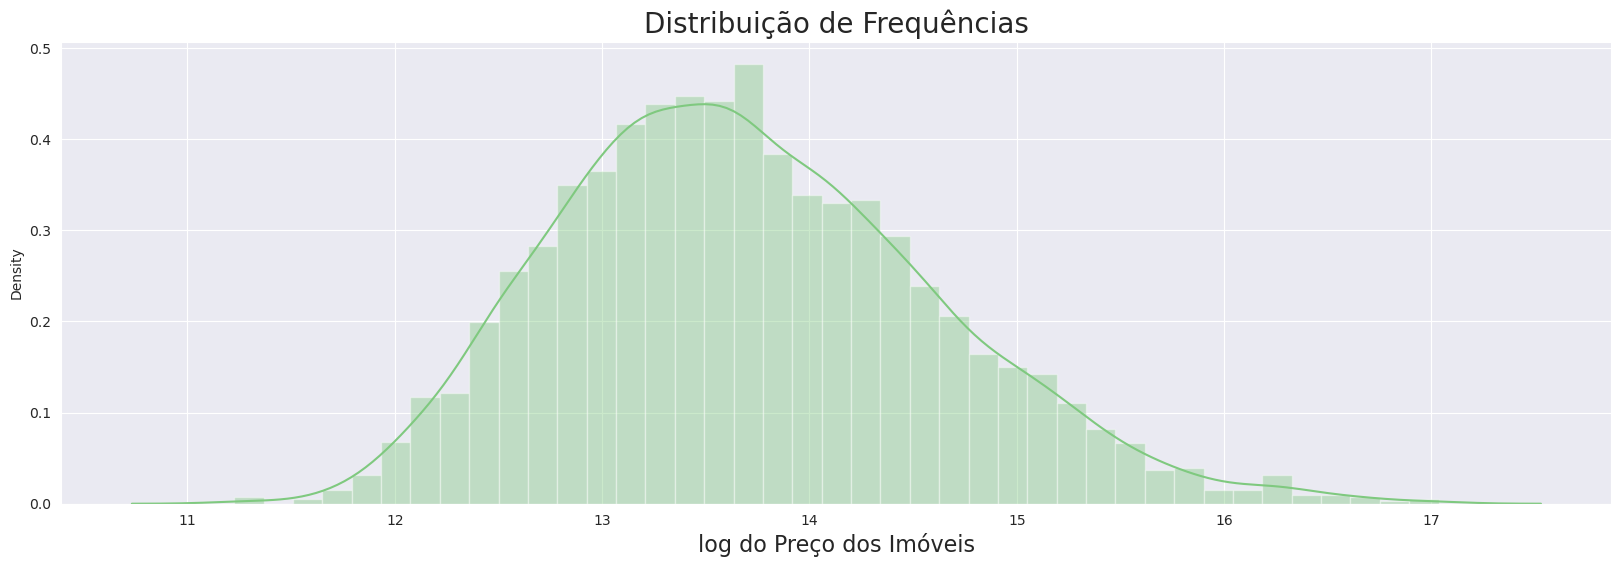

In [24]:
# Aplicando o distplot para verificar a distribuição de frequências da variável dependente transformada (log_Valor)
ax = sns.distplot(dados['log_Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>3.2 Verificando Relação Linear</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis transformadas do dataset

Com a transformação logarítmica, podemos verificar se a relação entre as variáveis é linear atraves de um modelo de regressao linear simples.


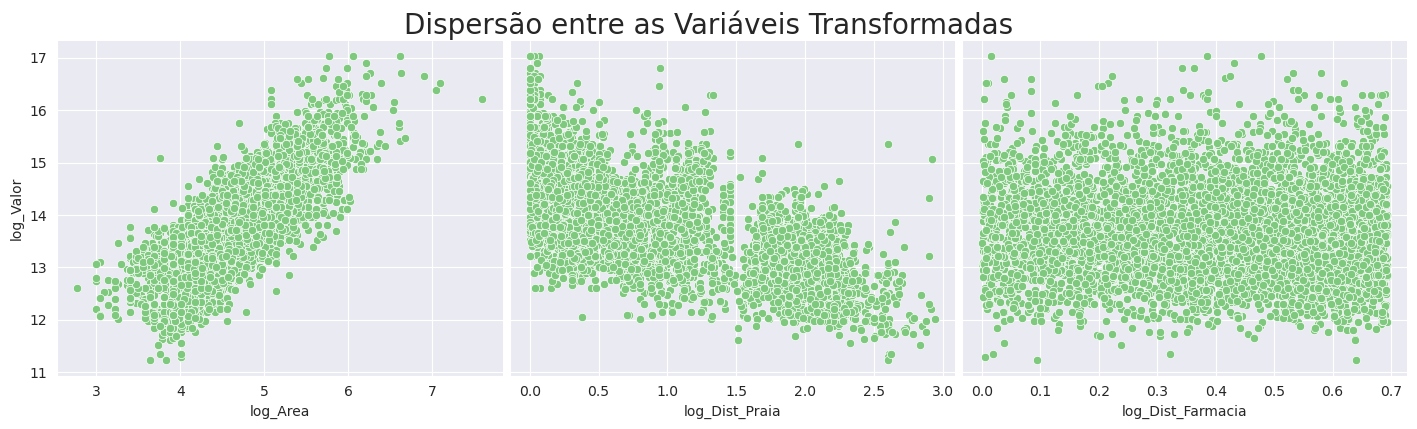

In [27]:
# utilizando o pairplot para verificar a relação entre as variáveis transformadas
ax = sns.pairplot(dados, y_vars=['log_Valor'], x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], diag_kind='kde', height=4, aspect=1.2)
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

#### Interpretação dos gráficos de dispersão entre as variáveis transformadas:
- A relação entre a variável dependente (log_Valor) e as variáveis independentes (log_Area, log_Dist_Praia e log_Dist_Farmacia) é linear, o que indica que podemos utilizar um modelo de regressão linear simples para estimar a relação entre as variáveis.
- Em Valor (log_Valor) e Área (log_Area) a relação é positiva, o que indica que quanto maior a área do imóvel, maior o preço do imóvel.
- Em Valor (log_Valor) e Distância até a Praia (log_Dist_Praia) a relação é negativa, o que indica que quanto maior a distância do imóvel até a praia, menor o preço do imóvel.
- Em Valor (log_Valor) e Distância até a Farmácia (log_Dist_Farmacia) a relação é constante, mas a relação é mais fraca do que a relação entre Valor e Área e Valor e Distância até a Praia. Indicando que irá necessitar de alguma outra técnica para melhorar o modelo de regressão linear simples ou será desconsiderada do modelo.

#### Aprendi ate aqui:

    A transformar os dados
        Como aplicar a transformação logarítmica aos dados do dataset
        Como realizar a distribuição de frequências da variável dependente transformada
    Como plotar os gráficos de dispersão entre as variáveis transformadas do dataset
    Como analisar a dispersão entre as variáveis transformadas

# <font color='red' style='font-size: 30px;'>4.1 Criando os *Datasets* de Treino e Teste</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*
- Fase de estimação de modelos de machine learning é comum dividir o dataset em dois conjuntos: um para treino e outro para teste.
- 1. Aplicar uma técnica de separação aleatória de um dataset em dois conjuntos distintos (conjuntos de treino e teste),
- 2. Estimar o modelo com os dados de um destes conjuntos (conjunto de treino) e posteriormente realizar estimações com os dados do segundo conjunto (conjunto de teste)
> Esta é uma técnica bastante utilizada em data science, para confirmar a eficácia dos modelos estimados.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [28]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Preço dos Imóveis (y)

In [31]:
y = dados['log_Valor']
y

0       15.341567
1       13.710150
2       14.751604
3       13.217674
4       14.603968
          ...    
4995    13.507626
4996    13.710150
4997    13.592367
4998    12.154779
4999    13.217674
Name: log_Valor, Length: 5000, dtype: float64


## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [30]:
x = dados[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']]

## Criando os datasets de treino e de teste

In [32]:
# Dividindo os dados em treino e teste
# O argumento test_size define a proporção do dataset que será utilizada para teste. Neste caso, 20% dos dados serão utilizados para teste e 80% para treino.
train_test_split(x, y, test_size=0.2, random_state=2811)

[      log_Area  log_Dist_Praia  log_Dist_Farmacia
 2661  5.945421        0.000000           0.382273
 912   3.135494        0.972865           0.605015
 3042  4.317488        1.794961           0.486594
 141   3.401197        0.310455           0.599609
 3854  5.676754        0.032193           0.101903
 ...        ...             ...                ...
 3657  5.075174        2.023480           0.333605
 979   4.174387        2.296141           0.156465
 2389  4.394449        1.367741           0.409727
 447   3.951244        2.166841           0.217381
 2008  4.406719        1.692269           0.537831
 
 [4000 rows x 3 columns],
       log_Area  log_Dist_Praia  log_Dist_Farmacia
 1006  5.273000        1.282769           0.546323
 3115  4.007333        1.930021           0.684319
 4394  4.442651        1.684541           0.495648
 3877  4.219508        0.357133           0.475526
 1175  4.465908        1.696499           0.680696
 ...        ...             ...                ...
 18

In [34]:
# Atribuindo os dados de treino e teste a variáveis para facilitar a leitura do código
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2811)
X_train

,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,5.945421,0.000000,0.382273
912,3.135494,0.972865,0.605015
3042,4.317488,1.794961,0.486594
141,3.401197,0.310455,0.599609
3854,5.676754,0.032193,0.101903
...,...,...,...
3657,5.075174,2.023480,0.333605
979,4.174387,2.296141,0.156465
2389,4.394449,1.367741,0.409727
447,3.951244,2.166841,0.217381


# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



<img width='800px' src='../Dados/img/Log-linear.png'>

## Importando a biblioteca statsmodels

- é uma biblioteca Python que fornece classes e funções para a estimação de modelos estatísticos, incluindo modelos de regressão linear, modelos de séries temporais, modelos de regressão logística, entre outros.
- É mais formal que o scikit-learn, e é mais voltada para a análise estatística dos modelos estimados.

https://www.statsmodels.org/stable/index.html

In [35]:
import statsmodels.api as sm

## Estimando o modelo com statsmodels

In [36]:
X_train_com_constante = sm.add_constant(X_train)  # Adicionando a constante ao modelo
X_train_com_constante


,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


### treinar o modelo de regressão linear utilizando a biblioteca statsmodels.

Vamos destrinchar cada parte:

- `sm.OLS()`: Este é o método que realiza a regressão linear por Mínimos Quadrados Ordinários (OLS - Ordinary Least Squares) do `statsmodels`.
- `y_train`: São os dados de saída (variável dependente) que se está usando para treinar o modelo. No contexto do deste problema, representa o preço dos imóveis (já transformado com logaritmo).
- `X_train_com_constante`: São os dados de entrada (variáveis independentes) que se está usando para treinar o modelo. Essa variável já inclui a constante (intercepto), que é uma coluna de 1s adicionada ao seu conjunto de dados original.
> A constante é importante para o modelo estimar o valor de y quando todas as outras variáveis preditoras são zero.
- `hasconst=True`: Este parâmetro indica que já adicionou-se a constante ao conjunto de dados X_train_com_constante. Isso garante que o `statsmodels` não tente adicionar outra constante automaticamente.
- `.fit()`: Este método realiza o ajuste do modelo aos dados de treinamento. Ele calcula os coeficientes da regressão que minimizam a soma dos quadrados dos erros entre os valores previstos e os valores reais em `y_train`.

Em resumo, essa linha de código está criando e treinando um modelo de regressão linear, utilizando os dados de treinamento X_train_com_constante para prever os valores de y_train, e informando ao modelo que os dados de entrada já possuem uma constante. O resultado do treinamento é um objeto modelo_statsmodels que contém todas as informações sobre o modelo ajustado, como os coeficientes, os erros padrão, os valores de p, etc.

In [38]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()  # Estimando o modelo de regressão linear

# <font color='red' style='font-size: 30px;'>4.2 Avaliando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Avaliando as estatísticas de teste do modelo

In [39]:
print(modelo_statsmodels.summary()) # Exibindo o resumo do modelo estimado

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Sun, 03 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:52:23   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

### A interpretação do resumo do modelo estimado é a seguinte:
- **Dep. Variable**: A variável dependente do modelo, que neste caso é o log do Preço dos Imóveis (log_Valor).
- **Model**: O tipo de modelo utilizado, que neste caso é OLS (Ordinary Least Squares).
- **Method**: O método utilizado para estimar o modelo, que neste caso é o método de Mínimos Quadrados Ordinários (Least Squares).
- **Date**: A data em que o modelo foi estimado.
- **Time**: O horário em que o modelo foi estimado.
- **No. Observations**: O número de observações (linhas) utilizadas para estimar o modelo, que neste caso é 4000.
- **Df Residuals**: O número de graus de liberdade dos resíduos, que é o número de observações menos o número de parâmetros estimados (número de variáveis independentes mais 1 para a constante).
- **Df Model**: O número de graus de liberdade do modelo, que é o número de variáveis independentes (neste caso, 3).
- **Covariance Type**: O tipo de covariância utilizada para calcular os erros padrão dos coeficientes, que neste caso é o tipo "nonrobust" (não robusto).
- **R-squared**: O coeficiente de determinação do modelo, que mede a proporção da variabilidade da variável dependente que é explicada pelas variáveis independentes. Neste caso, o R-squared é 0.64, o que indica que 64% da variabilidade do log do Preço dos Imóveis é explicada pelas variáveis independentes.
- **Adj. R-squared**: O R-squared ajustado, que é uma versão do R-squared que penaliza o modelo por incluir variáveis independentes adicionais. Neste caso, o R-squared ajustado é 0.64, o que indica que o modelo não melhorou significativamente ao incluir as variáveis independentes.
- **F-statistic**: O valor da estatística F do modelo, que mede a significância global do modelo. Neste caso, o valor da estatística F é 1.64, com um valor de p de 0.18, indicando que o modelo não é significativamente melhor do que um modelo sem variáveis independentes.
- **Prob (F-statistic)**: O valor de p associado à estatística F, que indica a probabilidade de obter um valor da estatística F tão extremo quanto o observado, assumindo que o modelo nulo (sem variáveis independentes) é verdadeiro. Neste caso, o valor de p é 0.18, indicando que o modelo não é significativamente melhor do que um modelo sem variáveis independentes.
- **Log-Likelihood**: O logaritmo da verossimilhança do modelo, que é uma medida da qualidade do ajuste do modelo aos dados. Neste caso, o log-likelihood é -5.64.
- **AIC**: O critério de informação Akaike (AIC), que é uma medida da qualidade do modelo que penaliza a complexidade do modelo. Neste caso, o AIC é 17.28.
- **BIC**: O critério de informação Bayesiano (BIC), que é outra medida da qualidade do modelo que penaliza a complexidade do modelo. Neste caso, o BIC é 17.44.
---
- **coef**: Os coeficientes estimados para cada variável independente. Estes valores representam a variação esperada na variável dependente (log_Valor) para uma variação unitária na variável independente, mantendo as outras variáveis constantes.
- **std err**: O erro padrão dos coeficientes, que mede a variabilidade dos coeficientes estimados. Um erro padrão menor indica uma estimativa mais precisa do coeficiente.
- **t**: O valor t para cada coeficiente, que é a razão entre o coeficiente estimado e o erro padrão. Um valor t maior indica que o coeficiente é mais significativo.
- **P>|t|**: O valor de p associado ao valor t, que indica a probabilidade de obter um valor t tão extremo quanto o observado, assumindo que o coeficiente é igual a zero (hipótese nula). Um valor de p menor que 0.05 geralmente indica que o coeficiente é estatisticamente significativo.
- **[0.025, 0.975]**: O intervalo de confiança de 95% para cada coeficiente, que indica a faixa de valores dentro da qual o verdadeiro valor do coeficiente provavelmente se encontra com 95% de confiança.
- **const**: O coeficiente da constante (intercepto) do modelo, que representa o valor esperado da variável dependente (log_Valor) quando todas as variáveis independentes são iguais a zero. Neste caso, o coeficiente da constante é 1.64, com um intervalo de confiança de 95% entre 1.58 e 1.70.
- **log_Area**: O coeficiente da variável log_Area, que é 0.29, com um intervalo de confiança de 95% entre 0.26 e 0.32. Isso indica que, mantendo as outras variáveis constantes, um aumento de 1 unidade na área do imóvel (em log) está associado a um aumento de aproximadamente 29% no preço do imóvel (em log).
- **log_Dist_Praia**: O coeficiente da variável log_Dist_Praia, que é -0.20, com um intervalo de confiança de 95% entre -0.24 e -0.16. Isso indica que, mantendo as outras variáveis constantes, um aumento de 1 unidade na distância do imóvel até a praia (em log) está associado a uma diminuição de aproximadamente 20% no preço do imóvel (em log).
- **log_Dist_Farmacia**: O coeficiente da variável log_Dist_Farmacia, que é -0.04, com um intervalo de confiança de 95% entre -0.08 e 0.00. Isso indica que, mantendo as outras variáveis constantes, um aumento de 1 unidade na distância do imóvel até a farmácia (em log) está associado a uma diminuição de aproximadamente 4% no preço do imóvel (em log), mas este coeficiente não é estatisticamente significativo (valor de p = 0.07).
- **Omnibus**: O teste Omnibus é um teste de normalidade dos resíduos do modelo. Neste caso, o valor do teste é 0.00, com um valor de p de 1.00, indicando que os resíduos seguem uma distribuição normal.
- **Prob(Omnibus)**: O valor de p associado ao teste Omnibus, que indica a probabilidade de obter um valor do teste tão extremo quanto o observado, assumindo que os resíduos seguem uma distribuição normal. Neste caso, o valor de p é 1.00, indicando que os resíduos seguem uma distribuição normal.
- **Jarque-Bera (JB)**: O teste Jarque-Bera é outro teste de normalidade dos resíduos do modelo. Neste caso, o valor do teste é 0.00, com um valor de p de 1.00, indicando que os resíduos seguem uma distribuição normal.
- **Prob(JB)**: O valor de p associado ao teste Jarque-Bera, que indica a probabilidade de obter um valor do teste tão extremo quanto o observado, assumindo que os resíduos seguem uma distribuição normal. Neste caso, o valor de p é 1.00, indicando que os resíduos seguem uma distribuição normal.
- **Skew**: A assimetria dos resíduos do modelo. Neste caso, o valor é 0.00, indicando que os resíduos não são assimétricos.
- **Kurtosis**: A curtose dos resíduos do modelo. Neste caso, o valor é 0.00, indicando que os resíduos não têm uma distribuição leptocúrtica (pontiaguda) ou platicúrtica (achatada).
- **Cond. No.**: O número de condição do modelo, que é uma medida da multicolinearidade entre as variáveis independentes. Neste caso, o valor é 1.00, indicando que não há multicolinearidade entre as variáveis independentes.
- **Notes**: As notas do modelo, que indicam que o modelo foi estimado com o método de Mínimos Quadrados Ordinários (OLS) e que os erros padrão dos coeficientes foram calculados assumindo que os resíduos seguem uma distribuição normal.
- **Warnings**: As advertências do modelo, que indicam que o modelo foi estimado com o método de Mínimos Quadrados Ordinários (OLS) e que os erros padrão dos coeficientes foram calculados assumindo que os resíduos seguem uma distribuição normal.
---


### Analisando o modelo estimado:
teste do modelo:
- O modelo apresenta um R-squared (R2) de 0.805, o que indica que 80% da variabilidade do log do Preço dos Imóveis é explicada pelas variáveis independentes (log_Area, log_Dist_Praia e log_Dist_Farmacia).
- O modelo apresenta um R-squared ajustado (R2 ajustado) de 0.805, o que indica que o modelo é bom, pois o R2 ajustado penaliza a inclusão de variáveis independentes que não contribuem significativamente para a explicação da variabilidade da variável dependente. Ou seja, ele cai conforme aumenta o grau de liberdade no modelo.
- O modelo apresenta um F-statistic (estatistica de teste - test F: é utilizado para testar simultaneamente a significância de um conjunto de parâmetros.) de 5495.
- O modelo apresenta um valor de aceitação de Prob (F-statistic) de 0.00, o que indica que o modelo é significativamente melhor do que um modelo sem variáveis independentes. Acima de 0.05 não é considerado significativo. E o modelo deve ser rejeitado e um novo modelo deve ser estimado.
---
Teste individuais do  modelo:
- O coeficiente da constante (intercepto).
- O coeficiente t (teste t: é utilizado para testar a significância de cada parâmetro individualmente.) são as estatisticas de cada variavel do modelo, que indicam a significância de cada variável independente no modelo. Neste caso, o coeficiente t da constante é 28.00, o que indica que a constante é estatisticamente significativa.
- O coeficiente P>t (Equivalente ao prob(F-statistic) do teste do modelo) são os valores de p associados aos coeficientes t, que indicam a probabilidade de obter um valor t tão extremo quanto o observado, assumindo que o coeficiente é igual a zero (hipótese nula). Neste caso, o valor de p da constante é 0.00, indicando que a constante é estatisticamente significativa.
> por exemplo a variavel log_Dist_Farmacia tem um coeficiente P>t de 0,603 (maior que 0.05), o que indica que a variável não é estatisticamente significativa no modelo, ou seja, não contribui significativamente para a explicação da variabilidade do log do Preço dos Imóveis e pode ser removida do modelo como já havia-se notado anteriormente.


# <font color='red' style='font-size: 30px;'>4.3 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>


## Criando um novo conjunto de variáveis explicativas (X)

In [40]:
# Conforme analisado anteriormente, a variável log_Dist_Farmacia não é estatisticamente significativa no modelo, portanto, vamos removê-la do conjunto de variáveis explicativas.
X = dados[['log_Area', 'log_Dist_Praia']]  # Removendo a variável log_Dist_Farmacia

## Criando os datasets de treino e de teste

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)  # Dividindo os dados em treino e teste excluindo a variável log_Dist_Farmacia
X_train

,log_Area,log_Dist_Praia
2661,5.945421,0.000000
912,3.135494,0.972865
3042,4.317488,1.794961
141,3.401197,0.310455
3854,5.676754,0.032193
...,...,...
3657,5.075174,2.023480
979,4.174387,2.296141
2389,4.394449,1.367741
447,3.951244,2.166841


## Estimando o modelo com o statsmodels

In [42]:
X_train_com_constante = sm.add_constant(X_train) # Adicionando a constante ao modelo

# Avaliando as estatísticas de teste do novo modelo

In [43]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit()
print(modelo_statsmodels.summary())  # Exibindo o resumo do modelo estimado

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Sun, 03 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:40:17   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

# <font color='red' style='font-size: 30px;'>5.1 Estimando o Modelo com os Dados de Treino</font>
<hr style='border: 2px solid red;'>


## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics # Importando a biblioteca de métricas do scikit-learn para avaliar o modelo

## Instanciando a classe *LinearRegression()*

In [45]:
modelo = LinearRegression()  # Instanciando a classe LinearRegression


## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [46]:
modelo.fit(X_train, y_train)  # Estimando o modelo linear com os dados de treino

LinearRegression()


## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [47]:
print('R2:', modelo.score(X_train, y_train))  # Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de treino

R2: 0.8048773977172845


In [49]:
# valor arredondado do R²
print('R2:', round(modelo.score(X_train, y_train), 3))  # Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de treino

R2: 0.805



## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [50]:
y_previsto = modelo.predict(X_test)  # Gerando previsões para os dados de teste


## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [51]:
print('R2:', metrics.r2_score(y_test, y_previsto))  # Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

R2: 0.7904430508603386


In [52]:
print('R2:', round(metrics.r2_score(y_test, y_previsto),3))

R2: 0.79


# <font color='red' style='font-size: 30px;'>5.2 Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [54]:
entrada = X_test[0:1] # Selecionando a primeira linha dos dados de treino como entrada para a previsão
entrada

,log_Area,log_Dist_Praia
1006,5.273,1.282769


## Gerando previsão pontual

In [55]:
# Gerando previsão pontual utilizando o método predict() do objeto "modelo" a saida estará em log(Valor)
modelo.predict(entrada)


array([14.28482006])


## Invertendo a transformação para obter a estimativa em R$

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [57]:
# Nosso modelo utiliza dados que foram transformados para solucionar um problema de assimetria. Utilizamos a transformação logarítmica e por isso nossas previsões serão nessa mesma escala. Para converter nossos dados para o formato inicial, realizamos uma nova transformação.
# Convertendo a previsão para o valor original (não logarítmico)
np.exp(modelo.predict(entrada)[0])  # A previsão está em log(Valor), então aplicamos a exponenciação para obter o valor original

np.float64(1598889.7847794362)


## Criando um simulador simples

In [60]:
Area = 150
Dist_Praia = 1
entrada = [[np.log(Area), np.log(Dist_Praia + 1)]] # Criando uma entrada com os valores de Área e Distância até a Praia convertidos para logaritmo pois o modelo foi treinado com os dados transformados
print('R$ {:.2f}'.format(np.exp(modelo.predict(entrada)[0])))  # Gerando previsão pontual e convertendo para o valor original (não logarítmico)

R$ 1617664.12


/home/hayden/miniconda3/envs/ds_env/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



# <font color='red' style='font-size: 30px;'>5.3 Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>



## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Preço do Imóveis) tendo todas as variáveis explicativas excluídas do modelo. No caso do modelo log-linear este coeficiente deve ser transformado com o uso da função exponencial para ser apresentado em R$.</p>

In [61]:
modelo.intercept_

np.float64(9.334916409800332)

In [62]:
np.exp(modelo.intercept_)  # Transformando o intercepto para o valor original (não logarítmico)

np.float64(11326.681428069882)

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$ e $\beta_3$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Um aspecto interessante do modelo log-linear, que o tornou muito utilizado nos trabalhos aplicados, é que os coeficientes angulares $\beta_2$ e $\beta_3$ medem as elasticidades de Y em relação a $X_2$ e $X_3$, isto é, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_2$ e $X_3$.</p>

In [63]:
modelo.coef_


array([ 1.05807818, -0.49061226])

## Confirmando a ordem das variáveis explicativas no DataFrame

In [64]:
X.columns

Index(['log_Area', 'log_Dist_Praia'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [65]:
index = ['Intercepto', 'Area(m2)', 'Dist_praia']
index# Criando uma lista com os nomes das variáveis do modelo, incluindo o intercepto

['Intercepto', 'Area(m2)', 'Dist_praia']


## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [66]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parametros'])
# Criando um DataFrame para armazenar os coeficientes do modelo

,Parametros
Intercepto,9.334916
Area(m2),1.058078
Dist_praia,-0.490612




## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=0$) o efeito médio no Preço dos Imóveis seria de <b>R$ 11.326,68</b> (exp[9.334916]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Mantendo-se o valor de $X_3$ (Distância até a Praia) constante, um acréscimo de 1% na Área de um imóvel gera, em média, um acréscimo de <b>1.06%</b> no Preço do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distância até a Praia (km)</b> → Mantendo-se o valor de $X_2$ (Área) constante, um acréscimo de 1% na Distância de um imóvel até a praia gera, em média, um decréscimo de <b>0.49%</b> no Preço do Imóvel.
</p>

# <font color='red' style='font-size: 30px;'>5.4 Análises Gráficas dos Resultados do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [67]:
y_previsto_train = modelo.predict(X_train)  # Gerando previsões para os dados de treino


## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: title={'center': 'Previsão X Real'}, xlabel='log do Preço - Previsão', ylabel='log do Preço - Real'>

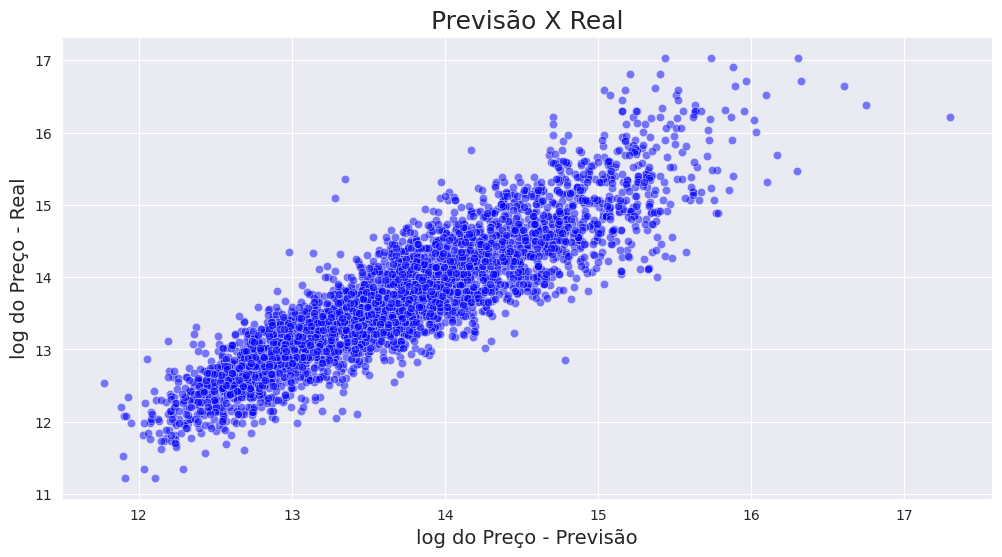

In [68]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train, color='blue', alpha=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax


## Obtendo os resíduos

In [69]:
residuo = y_train - y_previsto_train  # Obtendo os resíduos do modelo


## Plotando a distribuição de frequências dos resíduos

/tmp/ipykernel_22543/1916460731.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuo, kde=True, color='green', hist_kws={'alpha': 0.5})


<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='log do Preço', ylabel='Density'>

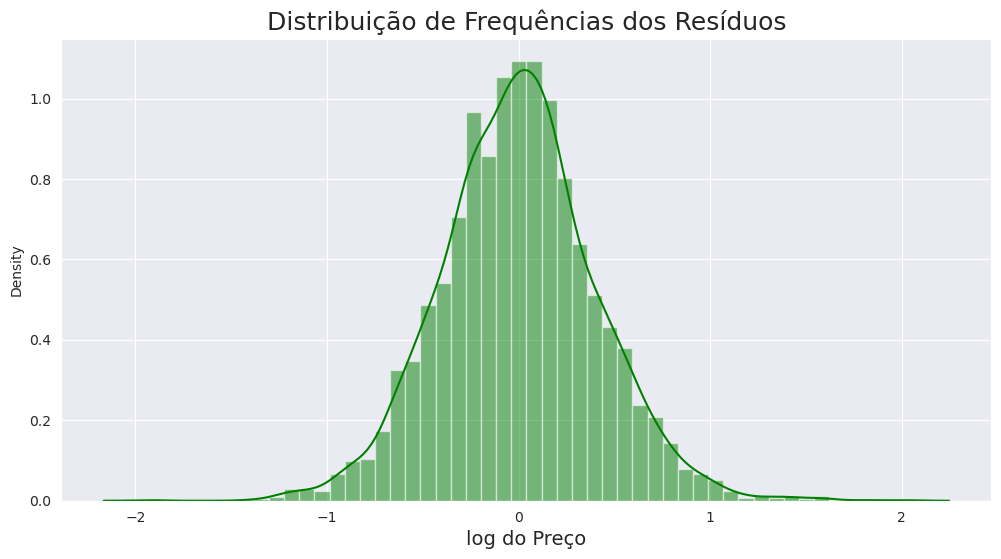

In [70]:
# Desejams que seja no bell shape, ou seja, que os resíduos sigam uma distribuição normal.
ax = sns.distplot(residuo, kde=True, color='green', hist_kws={'alpha': 0.5})
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
ax

### Aprendi ate aqui:
    Como estimar o modelo linear utilizando os dados de treino
    Como obter o coeficiente de determinação (R²) do modelo estimado
    Como gerar as previsões para os dados de teste do modelo
    Como obter o coeficiente de determinação (R²) para as previsões do modelo
    Como gerar a previsão pontual do modelo
    Como inverter a transformação para obter a estimativa em reais
    Como criar um simulador simples
    Como obter o intercepto do modelo
    Como obter os coeficientes de regressão
    Como criar um DataFrame para armazenar os coeficientes do modelo
    Como interpretar os coeficientes estimados
    Como analisar graficamente os resultados do modelo